**Context**

Analysts are required to explore data and reflect on the insights. Clear writing skill is an integral part of a good report. Note that the explanations must be such that readers with minimum knowledge of analytics is able to grasp the insight.

Austo Motor Company is a leading car manufacturer specializing in SUV, Sedan, and Hatchback models. In its recent board meeting, concerns were raised by the members on the efficiency of the marketing campaign currently being used. The board decides to rope in an analytics professional to improve the existing campaign.

**Objective**

They want to analyze the data to get a fair idea about the demand of customers which will help them in enhancing their customer experience. Suppose you are a Data Scientist at the company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

**Data Description**

Age: The age of the individual in years.

Gender: The gender of the individual, categorized as male or female.

Profession: The occupation or profession of the individual.

Marital_status: The marital status of the individual, such as married &, single

Education: The educational qualification of the individual Graduate and Post Graduate

No_of_Dependents: The number of dependents (e.g., children, elderly parents) that the individual supports financially.

Personal_loan: A binary variable indicating whether the individual has taken a personal loan "Yes" or "No"

House_loan: A binary variable indicating whether the individual has taken a housing loan "Yes" or "No"

Partner_working: A binary variable indicating whether the individual's partner is employed "Yes" or "No"

Salary: The individual's salary or income.

Partner_salary: The salary or income of the individual's partner, if applicable.

Total_salary: The total combined salary of the individual and their partner (if applicable).

Price: The price of a product or service.

Make: The type of automobile





In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline

In [4]:
# Load the data
df = pd.read_csv('/content/drive/MyDrive/project/austo_automobile.csv')

1.dataset

In [5]:
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


In [6]:
df.tail()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
1576,22,Male,Salaried,Single,Graduate,2,No,Yes,No,33300,0.0,33300,27000,Hatchback
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000,NaN,32000,31000,Hatchback
1578,22,Male,Business,Single,Graduate,2,No,Yes,No,32900,0.0,32900,30000,Hatchback
1579,22,Male,Business,Married,Graduate,3,Yes,Yes,No,32200,NaN,32200,24000,Hatchback
1580,22,Male,Salaried,Married,Graduate,4,No,No,No,31600,0.0,31600,31000,Hatchback


2.Size of the dataset

In [7]:
num_rows, num_columns = df.shape
print(f"\nSize of the dataset: {num_rows} rows, {num_columns} columns")


Size of the dataset: 1581 rows, 14 columns


The data set contains 1581 observations of data and 14 variables.

3. Data types of variables

In [8]:
print("\nData types of variables:")
print(df.dtypes)


Data types of variables:
Age                   int64
Gender               object
Profession           object
Marital_status       object
Education            object
No_of_Dependents      int64
Personal_loan        object
House_loan           object
Partner_working      object
Salary                int64
Partner_salary      float64
Total_salary          int64
Price                 int64
Make                 object
dtype: object


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.0+ KB


The dataset comprises 1581 observations, each containing 14 entries. Specifically, it includes 5 integer-type variables representing numerical data, 1 float-type variable representing numerical data, and 8 object-type variables representing categorical data.


4.Checking for missing value

In [10]:
print("\nMissing values/blanks in the dataset:")
print(df.isnull().sum())


Missing values/blanks in the dataset:
Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64


The dataset contains 53 null values in the "Gender" column and 106 null values in the "Partner_Salary" column.

5.  statistical summary of the dataset

In [11]:
print("\n Statistical summary of numerical columns:")
df.describe()


 Statistical summary of numerical columns:


,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price
count,1581.000000,1581.000000,1581.000000,1475.000000,1581.000000,1581.000000
mean,31.922201,2.457938,60392.220114,20225.559322,79625.996205,35597.722960
std,8.425978,0.943483,14674.825044,19573.149277,25545.857768,13633.636545
min,22.000000,0.000000,30000.000000,0.000000,30000.000000,18000.000000
25%,25.000000,2.000000,51900.000000,0.000000,60500.000000,25000.000000
50%,29.000000,2.000000,59500.000000,25600.000000,78000.000000,31000.000000
75%,38.000000,3.000000,71800.000000,38300.000000,95900.000000,47000.000000
max,54.000000,4.000000,99300.000000,80500.000000,171000.000000,70000.000000


6. Treating values

In [12]:
df['Gender'].value_counts()

Gender
Male      1199
Female     327
Femal        1
Femle        1
Name: count, dtype: int64

found some discrepancies and data is not consistent

In [13]:
df.Gender.replace(to_replace = 'Femal', value='Female' ,inplace=True)
df.Gender.replace(to_replace = 'Femle', value='Female' ,inplace=True)

In [14]:
df['Gender'].value_counts()

Gender
Male      1199
Female     329
Name: count, dtype: int64

After Fixing

7.Treating Missing values

In [15]:
print("\nMissing values/blanks in the dataset:")
print(df.isnull().sum())


Missing values/blanks in the dataset:
Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64


There are 53 null values in Gender and 106 null values in Partner_Salary dataset.

In [16]:
df['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [17]:
df.Gender = df.Gender.fillna('Male')

In [18]:
print("\nMissing values/blanks in the dataset:")
print(df.isnull().sum())


Missing values/blanks in the dataset:
Age                   0
Gender                0
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64


In [19]:
df['Partner_salary'].fillna(df.groupby('Gender')['Partner_salary'].transform("mean"), inplace=True)

8. checking null values

In [20]:
print("\nMissing values/blanks in the dataset:")
print(df.isnull().sum())


Missing values/blanks in the dataset:
Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64


After fix the blanks

In [21]:
dp = df.duplicated()
print('Number of duplicate rows = %d' % (dp.sum()))
df[dp]

Number of duplicate rows = 0


,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make


No Duplicates Found

In [22]:
print("\n Statistical summary of numerical columns:")
df.describe().T


 Statistical summary of numerical columns:


,count,mean,std,min,25%,50%,75%,max
Age,1581.0,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
No_of_Dependents,1581.0,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Salary,1581.0,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0
Partner_salary,1581.0,20230.655880,18909.850652,0.0,0.0,24900.0,38000.0,80500.0
Total_salary,1581.0,79625.996205,25545.857768,30000.0,60500.0,78000.0,95900.0,171000.0
Price,1581.0,35597.722960,13633.636545,18000.0,25000.0,31000.0,47000.0,70000.0


In [23]:
df.describe()

,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price
count,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000
mean,31.922201,2.457938,60392.220114,20230.655880,79625.996205,35597.722960
std,8.425978,0.943483,14674.825044,18909.850652,25545.857768,13633.636545
min,22.000000,0.000000,30000.000000,0.000000,30000.000000,18000.000000
25%,25.000000,2.000000,51900.000000,0.000000,60500.000000,25000.000000
50%,29.000000,2.000000,59500.000000,24900.000000,78000.000000,31000.000000
75%,38.000000,3.000000,71800.000000,38000.000000,95900.000000,47000.000000
max,54.000000,4.000000,99300.000000,80500.000000,171000.000000,70000.000000


9.Distribution of continuous variables using histograms

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'No_of_Dependents'}>],
       [<Axes: title={'center': 'Salary'}>,
        <Axes: title={'center': 'Partner_salary'}>],
       [<Axes: title={'center': 'Total_salary'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

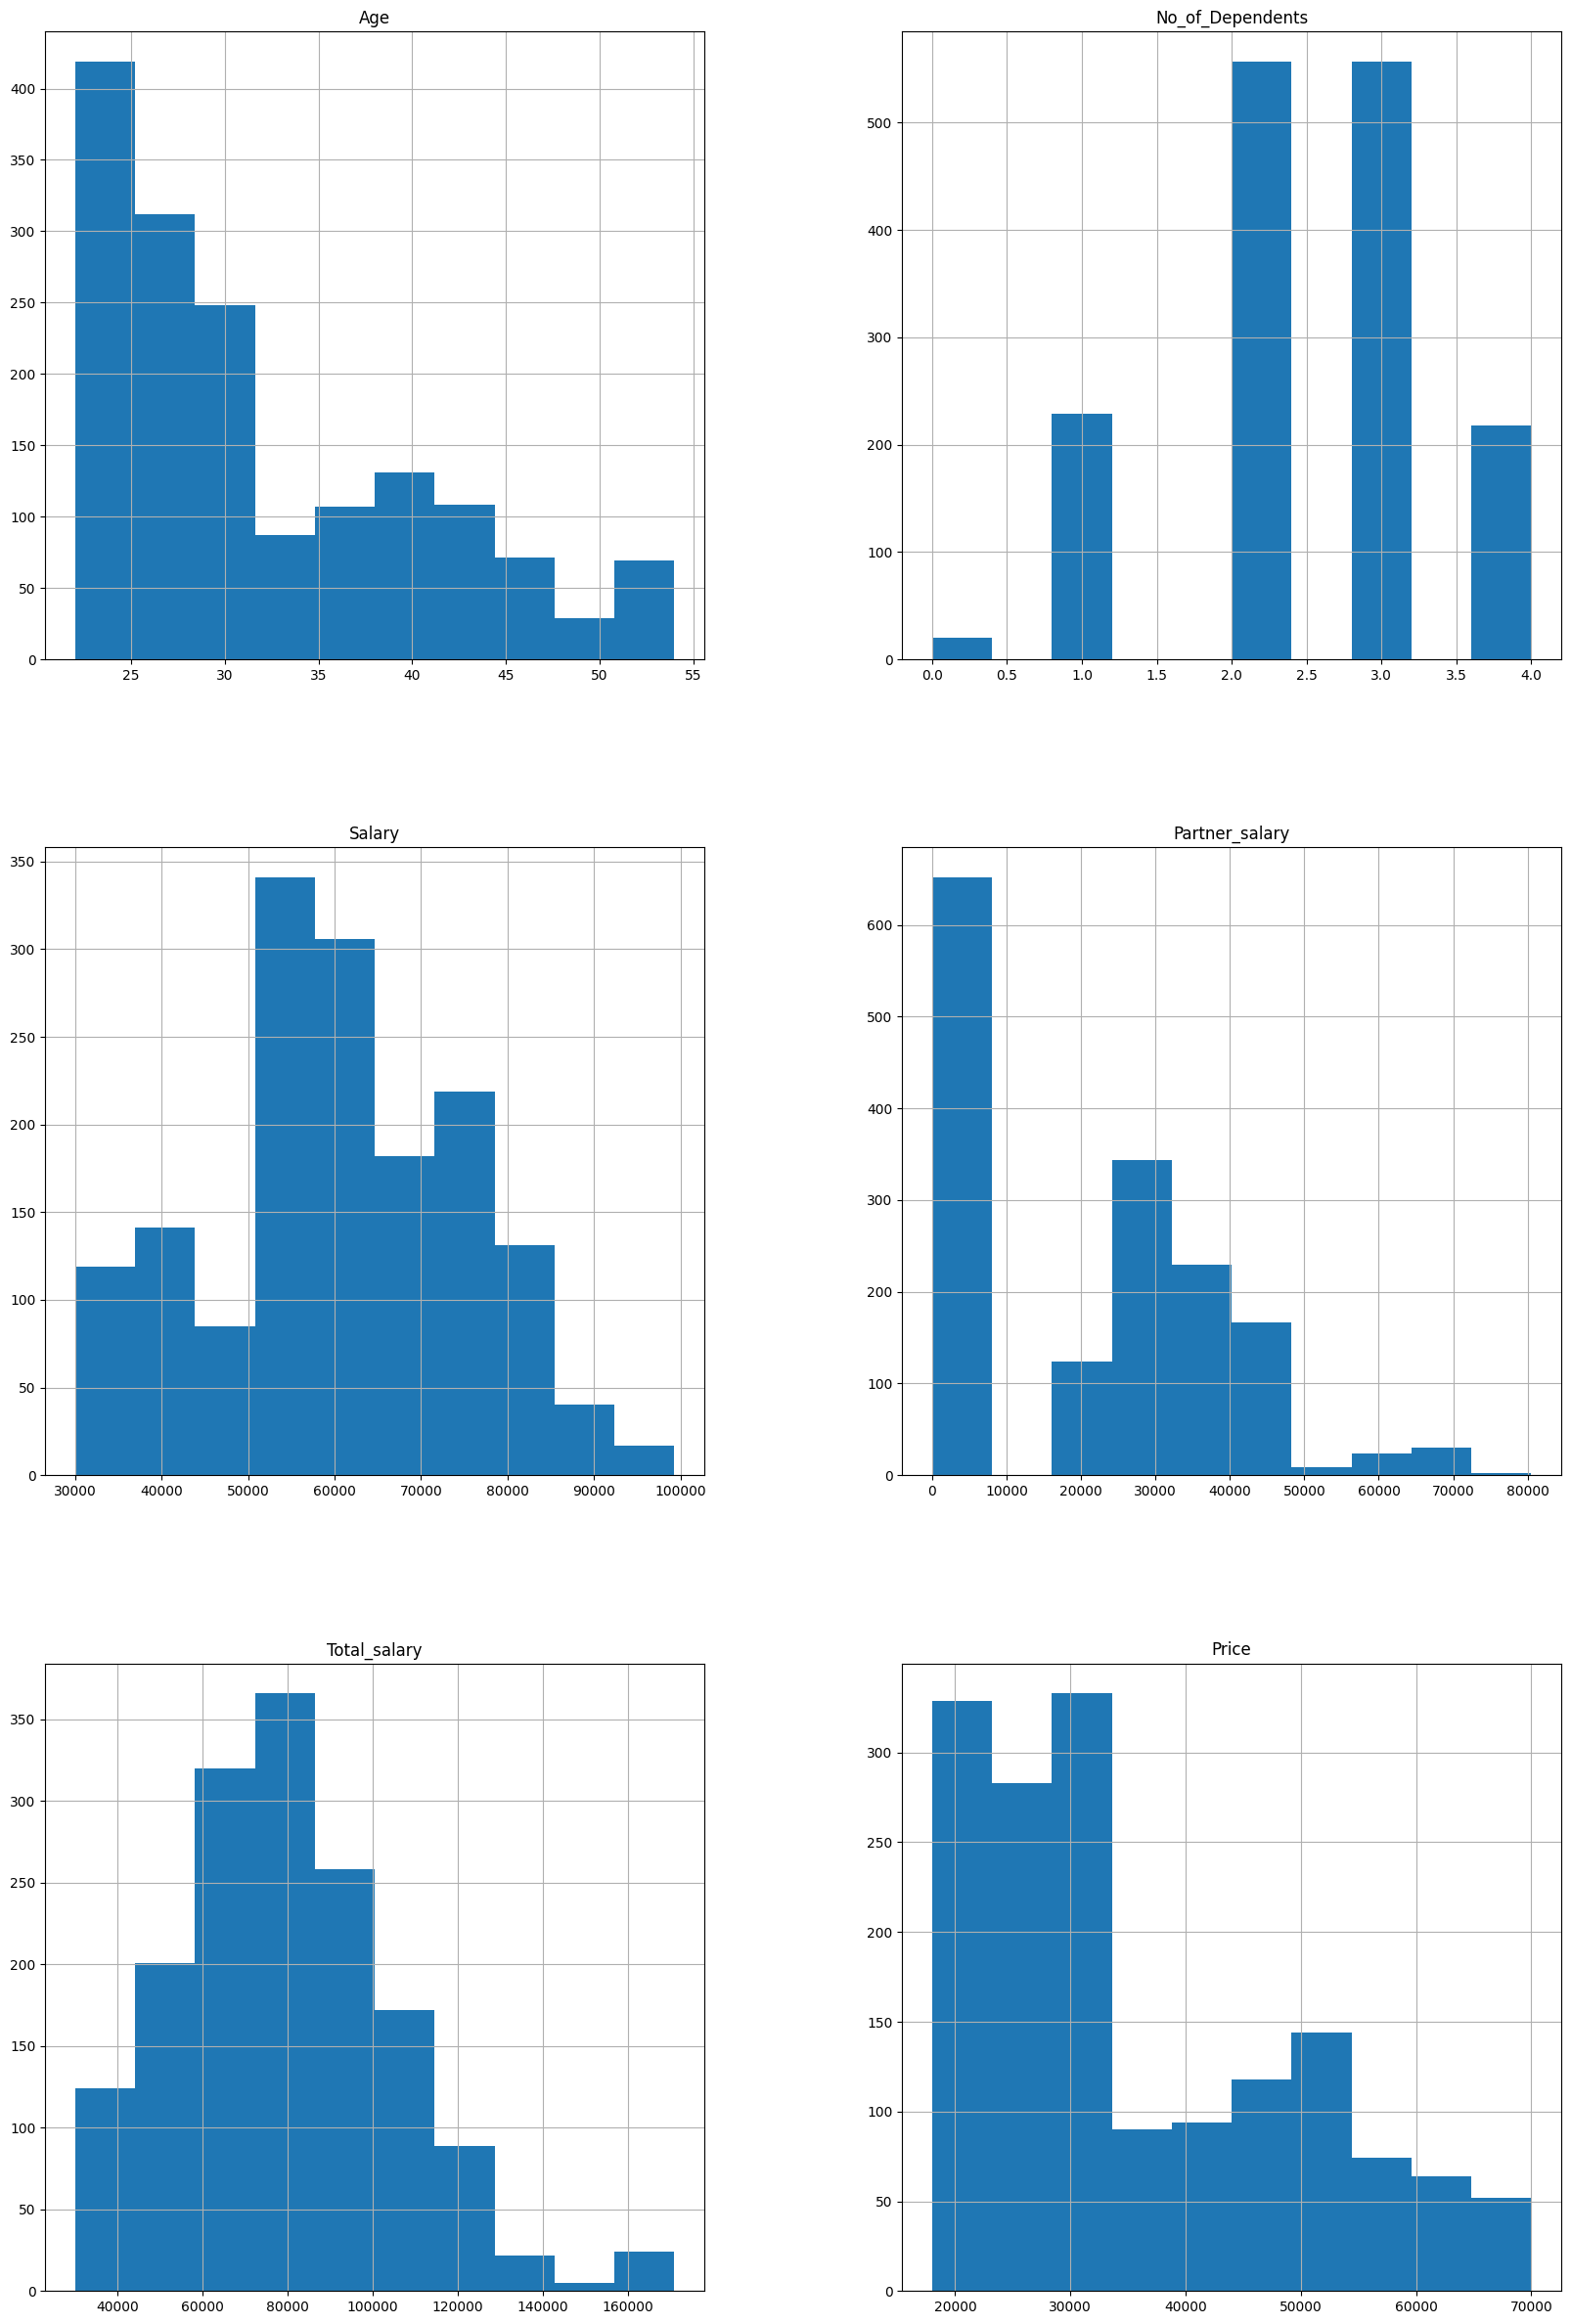

In [24]:
df.hist(figsize=(20,30))

Based on the histograms above, it is evident that the age distribution is left-skewed, while the distribution of no_of_dependents is not uniform and appears right-skewed. The distribution of salary appears to be uniform, whereas that of partner_salary is non-uniform and exhibits a left-skewed pattern. Similarly, the distribution of total_salary and price also show left-skewed tendencies.






10.Distribution of variables using countplot

<Axes: xlabel='Gender', ylabel='count'>

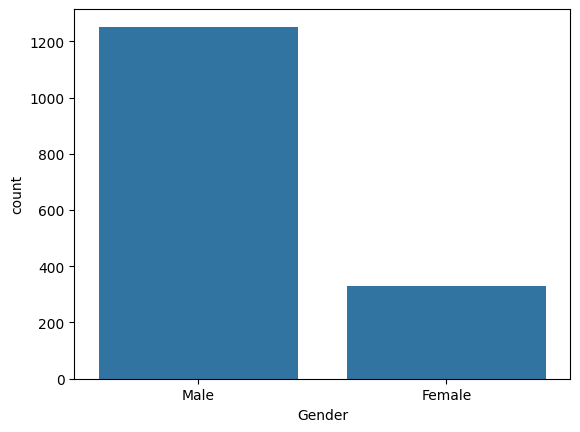

In [25]:
sns.countplot(x=df['Gender'])


We can see Gender count of Male is higher than Female

<Axes: xlabel='Profession', ylabel='count'>

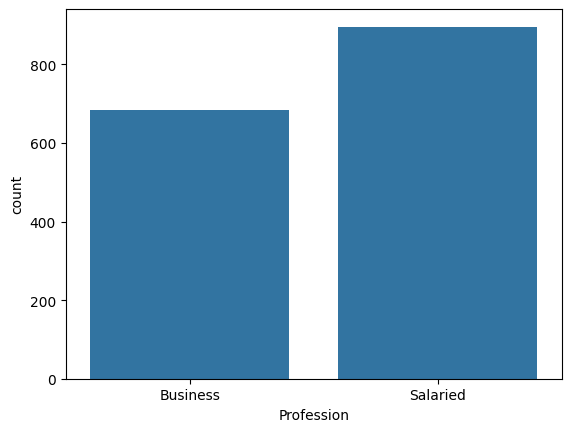

In [26]:
sns.countplot(x=df['Profession'])

We can see professional wise – Salaried people are more than business professionals.

<Axes: xlabel='Marital_status', ylabel='count'>

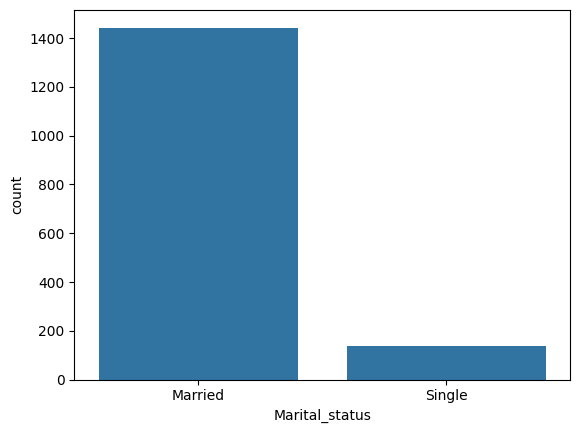

In [27]:
sns.countplot(x=df['Marital_status'])


married people are more than the singled one’s.

<Axes: xlabel='Education', ylabel='count'>

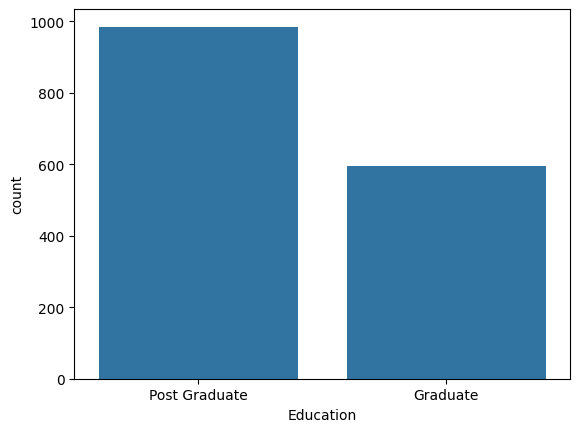

In [28]:
sns.countplot(x=df['Education'])

We can see most people background education shows as post graduate and compartively people have also pursued graduate degree education.  

<Axes: xlabel='House_loan', ylabel='count'>

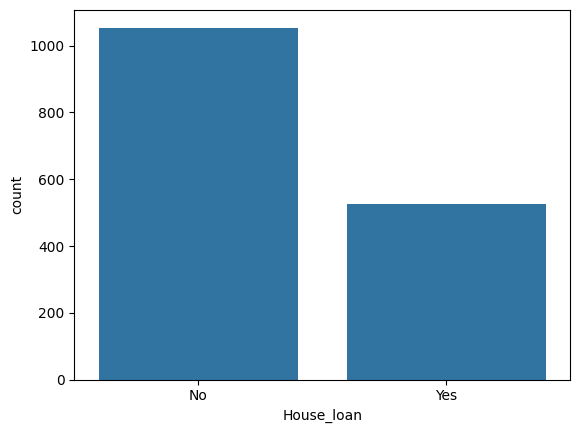

In [29]:
sns.countplot(x=df['House_loan'])

more number of people didn’t take house_loan but half of the count of the people have taken house_loan.

<Axes: xlabel='Personal_loan', ylabel='count'>

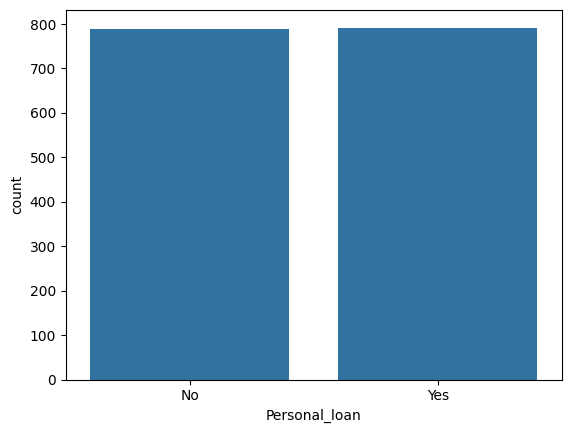

In [30]:
sns.countplot(x=df['Personal_loan'])

personal_loan status shows as same

<Axes: xlabel='Partner_working', ylabel='count'>

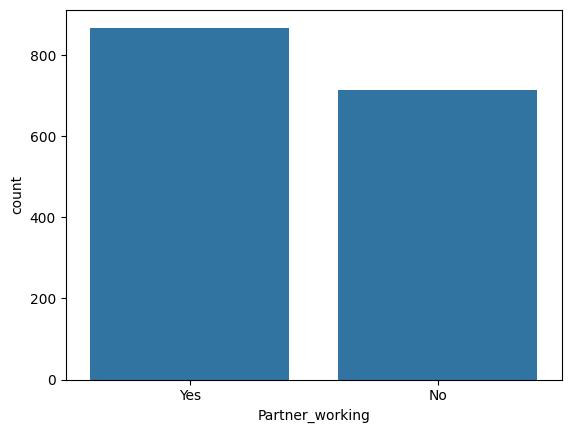

In [31]:
sns.countplot(x=df['Partner_working'])


<Axes: xlabel='Make', ylabel='count'>

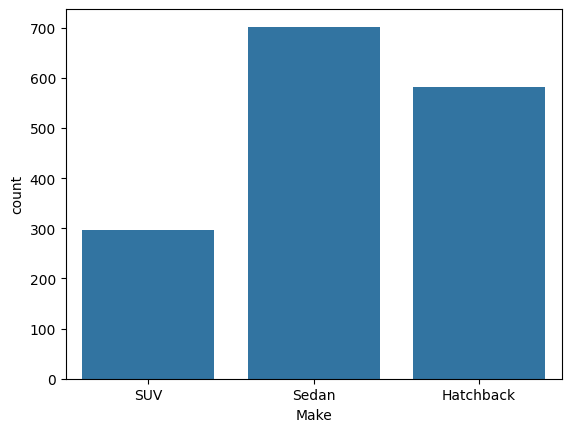

In [32]:
sns.countplot(x=df['Make'])

The above plot depicts that Brand ‘Sedan’ is the most purchased followed by ‘Hatchback’ and the least is ‘SUV’

<Axes: xlabel='Gender', ylabel='Age'>

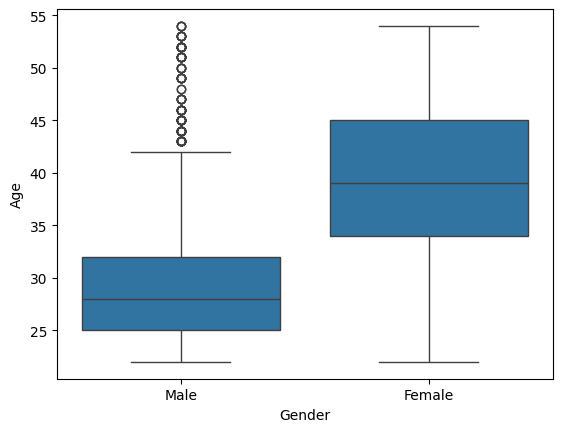

In [33]:
sns.boxplot(x="Gender", y="Age", data=df)

From the plot above, it is apparent that the male gender exhibits a higher frequency of extreme age values compared to the female gender.

In [34]:
pd.crosstab(df['Make'],df['Gender'])

Gender,Female,Male
Make,,
Hatchback,15,567
SUV,173,124
Sedan,141,561


Here, the data suggests a preference among females for SUV automobiles, while males tend to favor hatchback automobiles.





In [35]:
pd.crosstab(df['Make'],df['Marital_status'])

Marital_status,Married,Single
Make,,
Hatchback,498,84
SUV,281,16
Sedan,664,38


Another observation to note is that there appears to be a higher proportion of married individuals opting for sedan automobiles, whereas singles tend to show a preference for hatchback automobiles.




<Axes: xlabel='Age'>

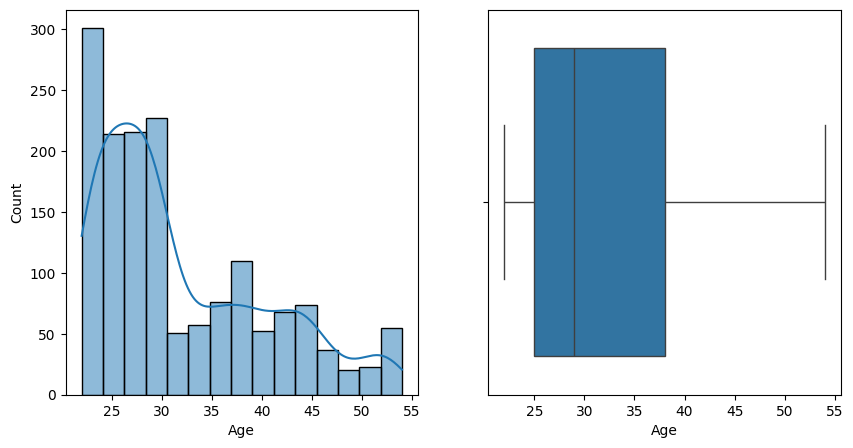

In [36]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(df.Age, kde=True, ax=axs[0])
sns.boxplot(x='Age',data=df, ax=axs[1])

Using a histogram plot, we observe a right-skewed distribution in the variable "Age." Additionally, employing a boxplot reveals the absence of outliers within the "Age" variable.

<Axes: xlabel='Partner_salary'>

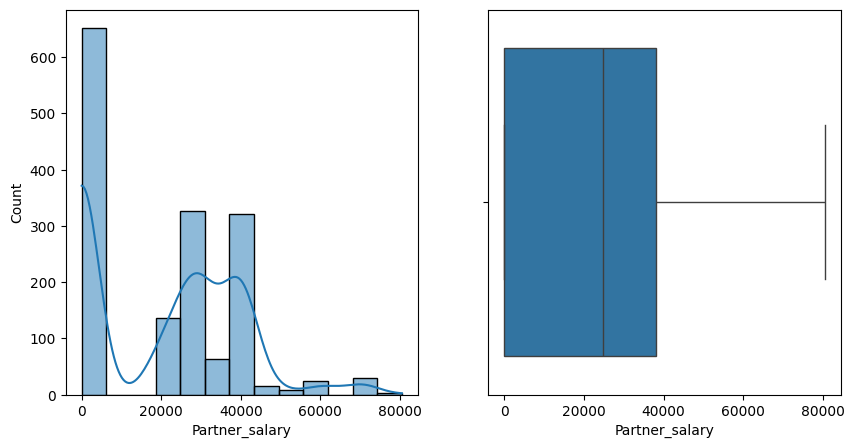

In [37]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(df.Partner_salary, kde=True, ax=axs[0])
sns.boxplot(x='Partner_salary',data=df, ax=axs[1])

Similarly, employing a boxplot analysis indicates the absence of outliers in the "Partner_Salary" variable. Furthermore, utilizing a histogram plot reveals a right-skewed distribution pattern within the "Partner_Salary" variable.

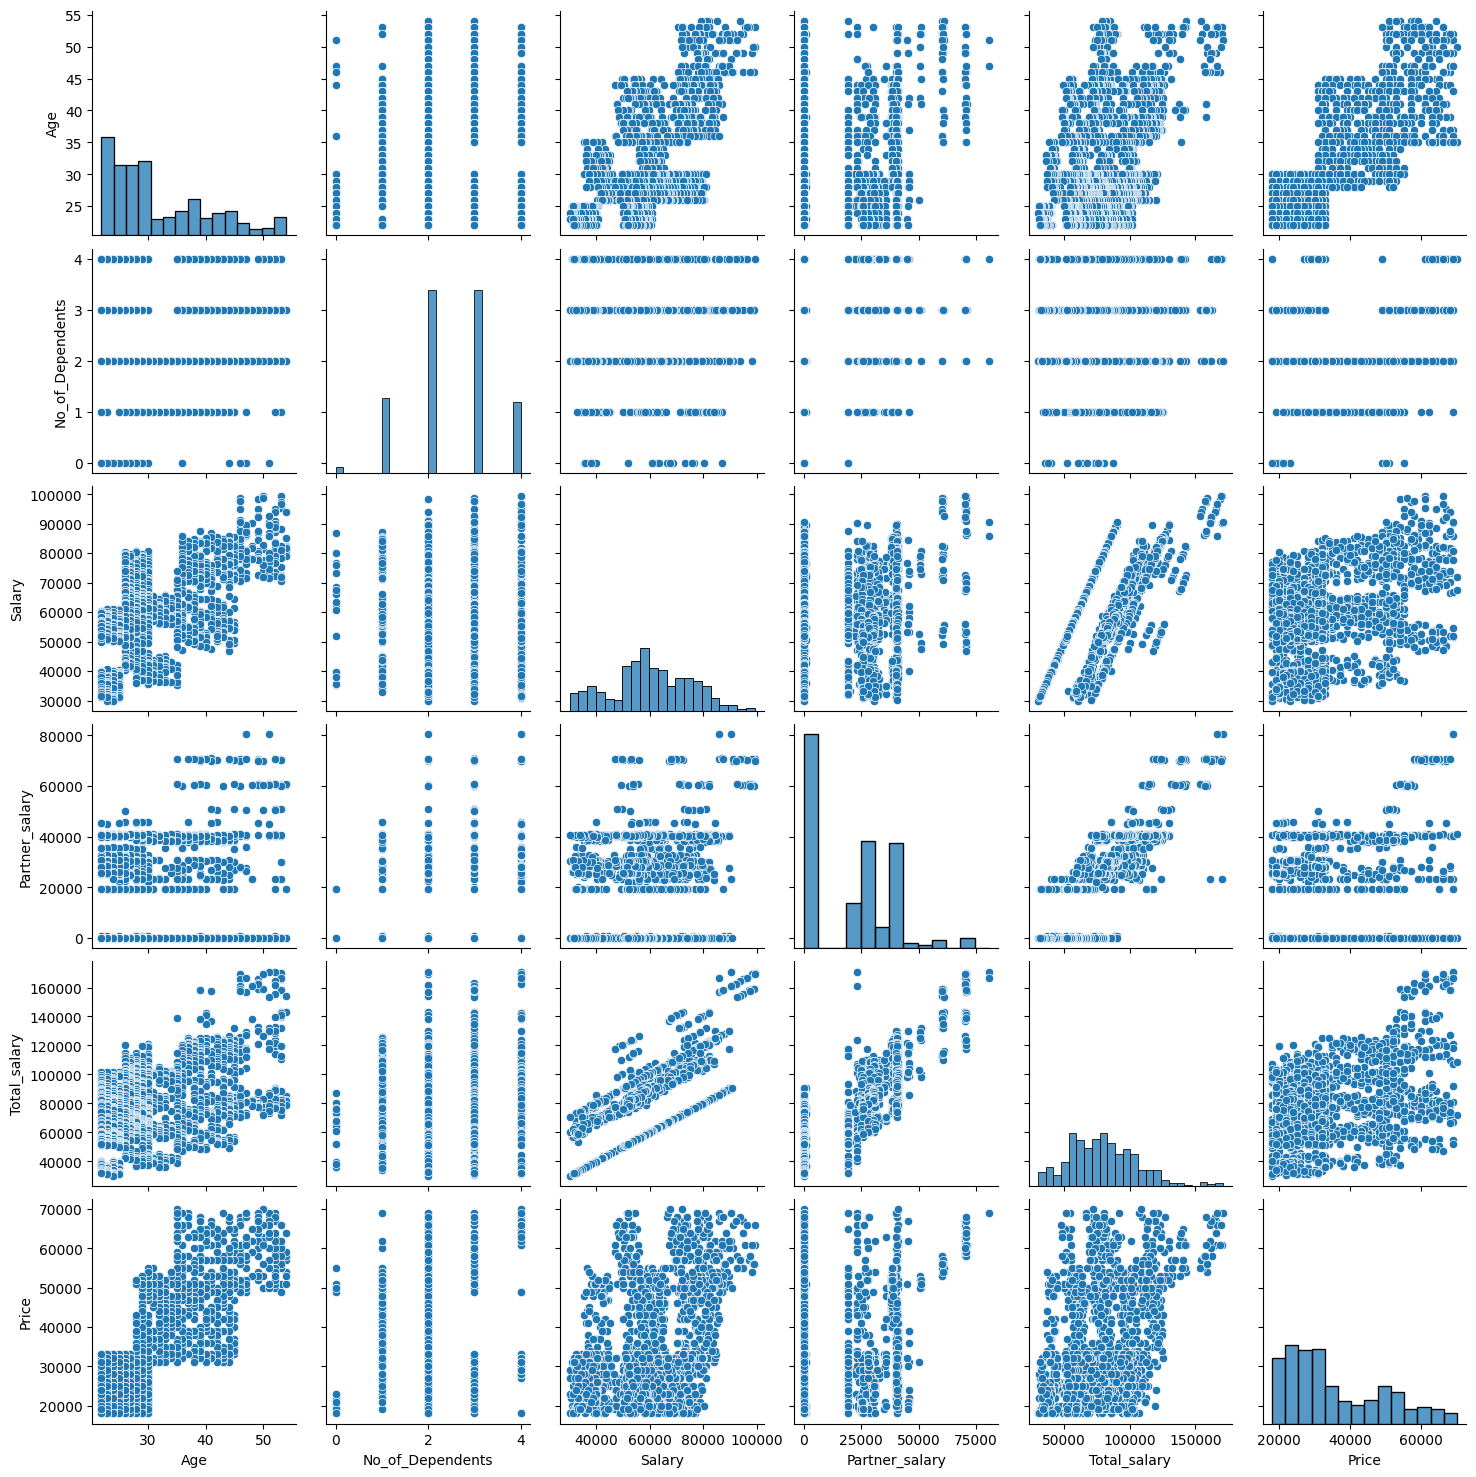

In [38]:
sns.pairplot(df)
plt.show()

Utilizing a pairplot enables us to visualize the bivariate distribution. It appears that as age increases, salary also tends to increase. Additionally, there seems to be a positive correlation between age and the amount spent on purchases, indicating that individuals with higher ages tend to spend more.





11.Correlation heatmap

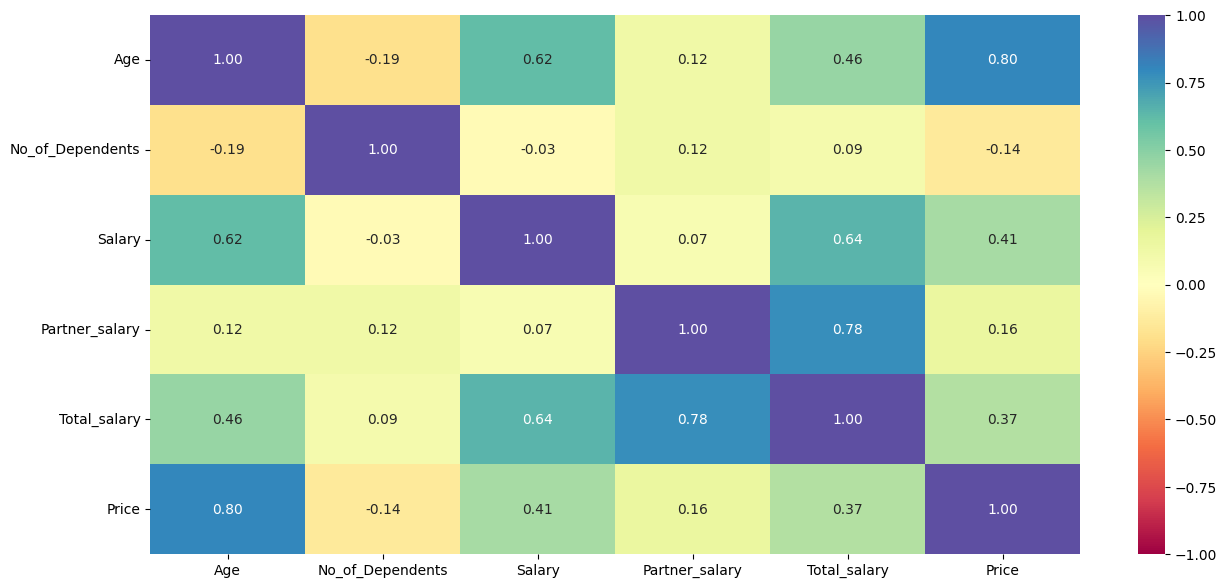

In [39]:
col_list = ['Age','No_of_Dependents', 'Salary', 'Partner_salary','Total_salary','Price']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

12. Univariate Analysis using Age and no_of_dependents

In [40]:
df[['Age','No_of_Dependents']].describe()

,Age,No_of_Dependents
count,1581.000000,1581.000000
mean,31.922201,2.457938
std,8.425978,0.943483
min,22.000000,0.000000
25%,25.000000,2.000000
50%,29.000000,2.000000
75%,38.000000,3.000000
max,54.000000,4.000000


The "Age" attribute ranges from a minimum of 22 years to a maximum of 54 years. Upon analysis, it is observed that 50% of the individuals have an age of 29 years.

Regarding the "No_of_Dependents" attribute, the minimum value is 0, and the maximum is 4. Further examination reveals that 25% and 50% of the age group between 25 to 29 years have 2 dependents, while 75% of individuals aged 38 have 3 dependents.

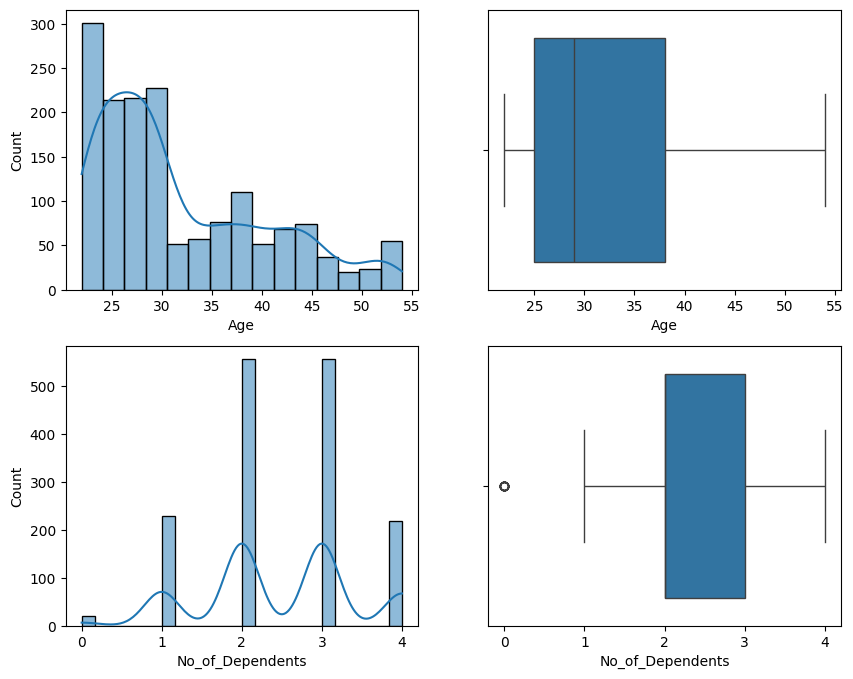

In [41]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10,8)
sns.histplot(df['Age'], kde=True, ax=axes[0][0])
sns.boxplot(x='Age', data=df, ax=axes[0][1])
sns.histplot(df['No_of_Dependents'] , kde=True, ax=axes[1][0])
sns.boxplot(x='No_of_Dependents', data=df , ax=axes[1][1])
plt.show()

From the two plots above, it's evident that there are no outliers present in the "Age" variable. However, outliers are apparent in the "No_of_Dependents" variable.

13.Analysis on Total_salary and Partner_salary

In [42]:
df[['Total_salary','Partner_salary']].describe()

,Total_salary,Partner_salary
count,1581.000000,1581.000000
mean,79625.996205,20230.655880
std,25545.857768,18909.850652
min,30000.000000,0.000000
25%,60500.000000,0.000000
50%,78000.000000,24900.000000
75%,95900.000000,38000.000000
max,171000.000000,80500.000000


From the data, we can conclude that the minimum salary for "Total_salary" is 30,000, with a maximum salary of 171,000. In the case of "Partner_salary," the minimum salary is 0, indicating that 25% of partners who are working do not contribute financially. The maximum salary observed in the "Partner_salary" column is 80,500.

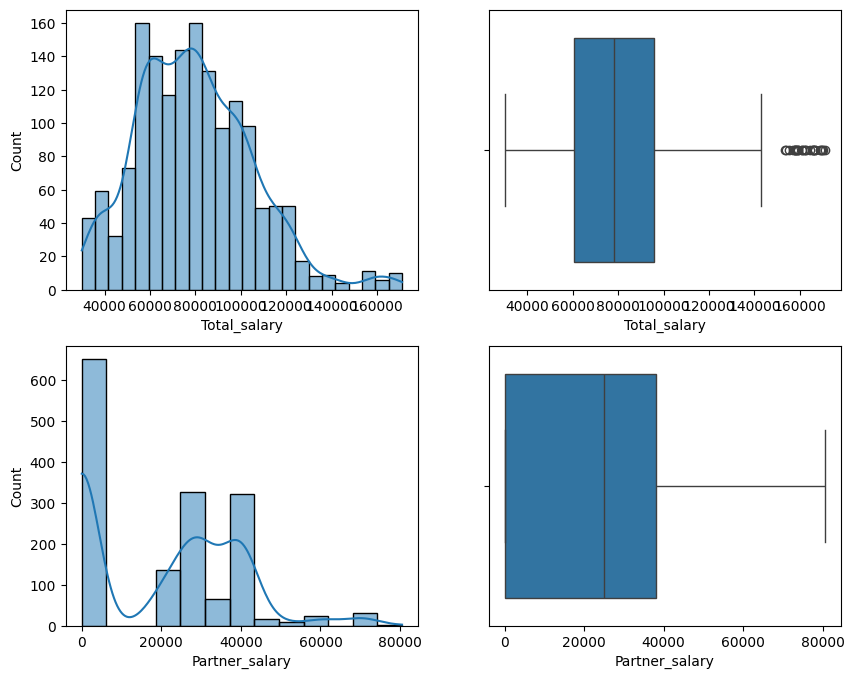

In [43]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10,8)
sns.histplot(df['Total_salary'], kde=True, ax=axes[0][0])
sns.boxplot(x='Total_salary', data=df, ax=axes[0][1])
sns.histplot(df['Partner_salary'] , kde=True, ax=axes[1][0])
sns.boxplot(x='Partner_salary', data=df , ax=axes[1][1])
plt.show()

We can see more outliers found in Total_Salary which we will treat it later. But no outliers found in Partner_salary.

14. Categorical variable using Gender

In [44]:
df['Gender'].value_counts(normalize=True)

Gender
Male      0.791904
Female    0.208096
Name: proportion, dtype: float64

So the Gender categorical variable we have displayed the results in percentage form which contributes 0.80% as Male and %0.20 as Female

<Axes: xlabel='Gender', ylabel='count'>

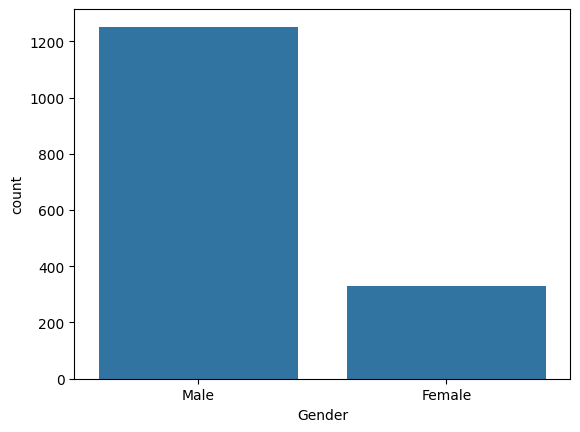

In [45]:
sns.countplot(x='Gender', data=df)

From the above plot, we can depict that count of Male gender is more when compared to Female gender.

15. Categorical variable using Profession

In [46]:
df['Profession'].value_counts(normalize=True)

Profession
Salaried    0.56673
Business    0.43327
Name: proportion, dtype: float64

<Axes: xlabel='Profession', ylabel='count'>

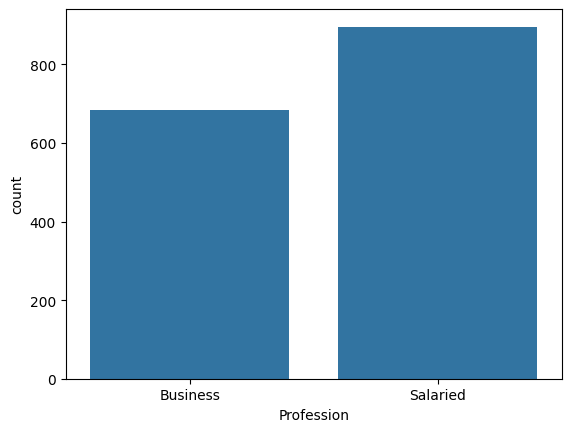

In [47]:
sns.countplot(x='Profession', data=df)

So we can conclude that 0.57% constitutes Salaried profession and remaining 0.43% belongs to Business profession

15. Bivariate Analysis using 2 numeric variables such as Salary and Price


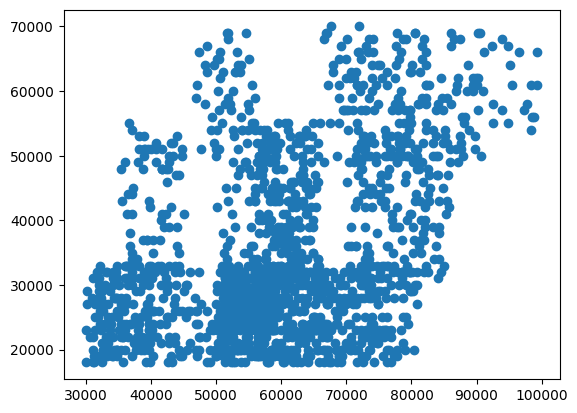

In [48]:
plt.scatter(df['Salary'],df['Price'])

we can see as gradually salary keeps on increasing even the amount of price spent also gets increased.

16.categorical variables Marital_status and Partner_working

<Axes: xlabel='Marital_status', ylabel='count'>

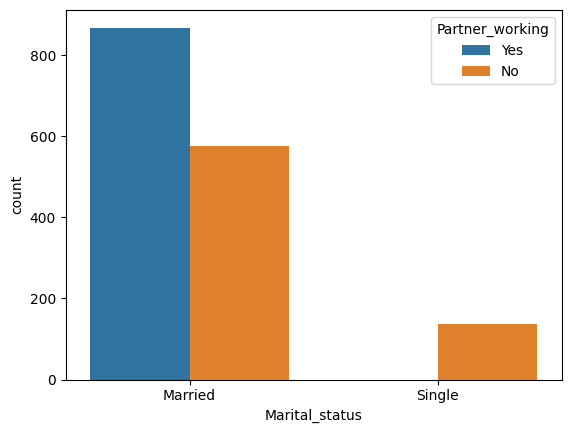

In [49]:
sns.countplot(x='Marital_status', hue='Partner_working', data=df)

In [50]:
pd.crosstab(df['Marital_status'], df['Partner_working'], margins=True, normalize = True)

Partner_working,No,Yes,All
Marital_status,,,
Married,0.363694,0.54902,0.912713
Single,0.087287,0.00000,0.087287
All,0.450980,0.54902,1.000000


we can assume that 0.087% are single and 0.91% constitutes to married people which includes partner_working

17.Categorical & Numerical value Salary and Profession

<Axes: xlabel='Salary', ylabel='Profession'>

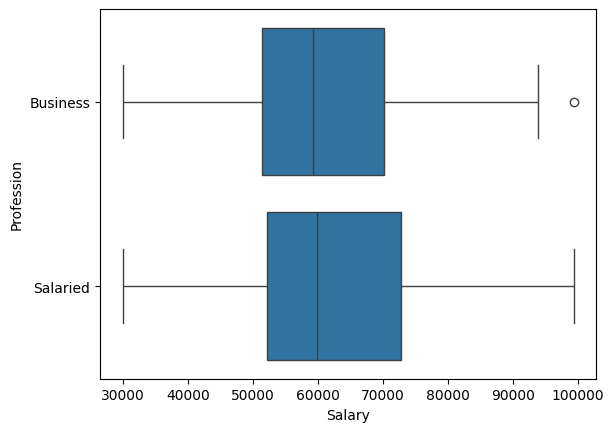

In [51]:
fig_dims = (15, 10)
sns.boxplot(x='Salary', y='Profession', data=df)

So when we see the median salary of both business and salaried profession people it looks like same salary.

18.Total_salary and Personal_loan

<Axes: xlabel='Total_salary', ylabel='Personal_loan'>

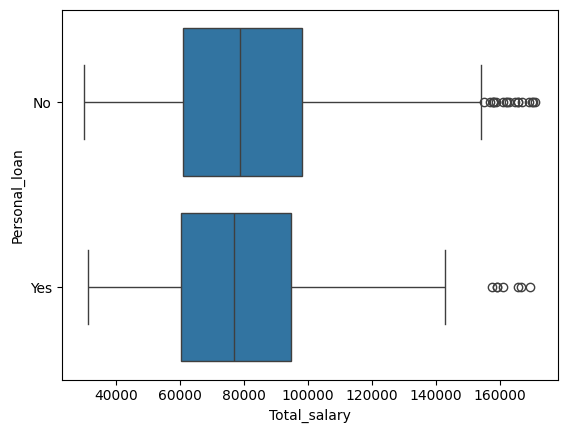

In [52]:
fig_dims = (15, 10)
sns.boxplot(x='Total_salary', y='Personal_loan', data=df)

Here, it's noticeable that the median value of "total_salary" for individuals who have taken a personal loan is slightly lower, but still quite close to the median value of "total_salary" for those who haven't opted for a personal loan.

19.Multivariate Analysis using Marital_status , Age , Gender

<Axes: xlabel='Marital_status', ylabel='Age'>

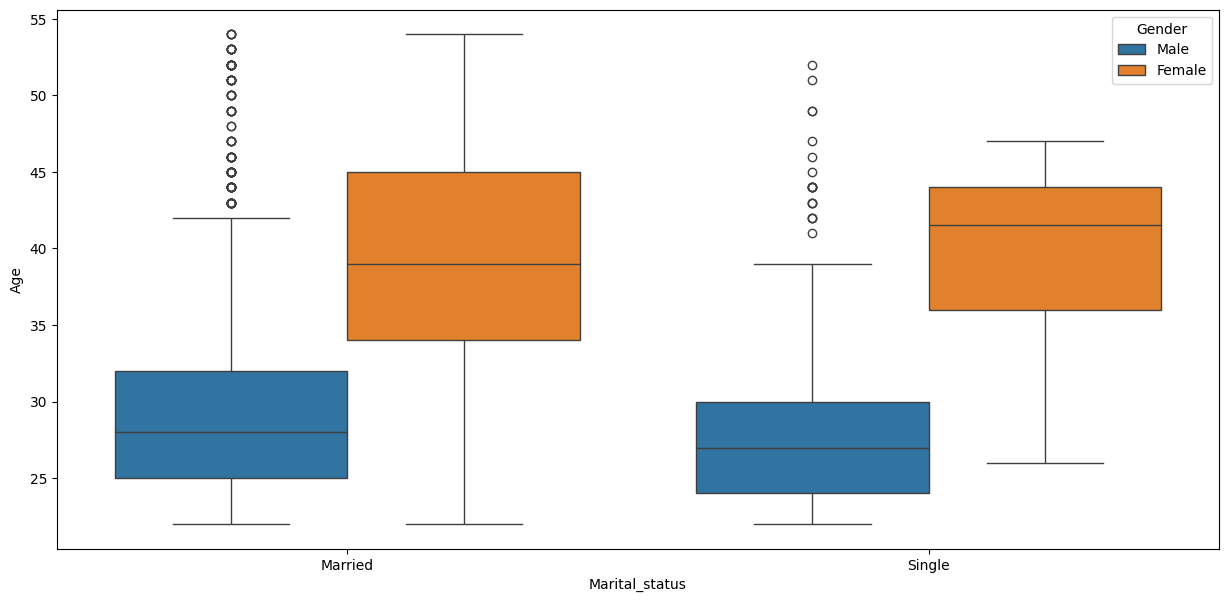

In [53]:
fig_dims = (15, 7)
fig = plt.subplots(figsize=fig_dims)
sns.boxplot(x='Marital_status', y='Age', hue='Gender',data=df)

From the provided plot, it's apparent that among females, those who are single exhibit a higher median value in terms of marital status when compared to males.

20. 2 or more variales using Facegrid

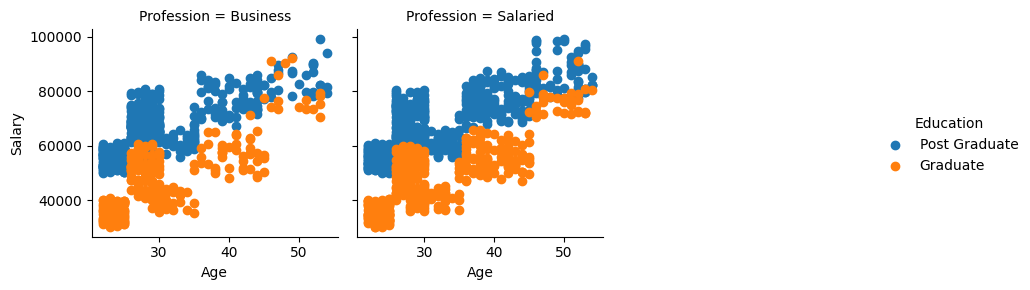

In [54]:
g = sns.FacetGrid(df, col="Profession", hue='Education',col_wrap=3, height=3)
g = g.map(plt.scatter, "Age", 'Salary')
g.add_legend()

Hereby, we can overall see that most of the profession who are salaried has more number of eductaion status as post graduation and graduate when compared to business profession.

21.Skewness

In [55]:
import scipy.stats as stats

In [56]:
pd.DataFrame({'Skewness' : [stats.skew(df.Age),stats.skew(df.No_of_Dependents),stats.skew(df.Salary),stats.skew(df.Total_salary),stats.skew(df.Price),stats.skew(df.Partner_salary)]},
                        index=['Age','No_of_Dependents','Salary','Total_salary','Price','Partner_salary'])

,Skewness
Age,0.892240
No_of_Dependents,-0.129685
Salary,-0.011560
Total_salary,0.609127
Price,0.740171
Partner_salary,0.348835


It appears that the distributions of "Age," "Total_salary," "Price," and "Partner_salary" exhibit moderately skewed characteristics, while "No_of_Dependents" and "Salary" appear to approximate symmetric distributions.

22.Outliners

<Axes: >

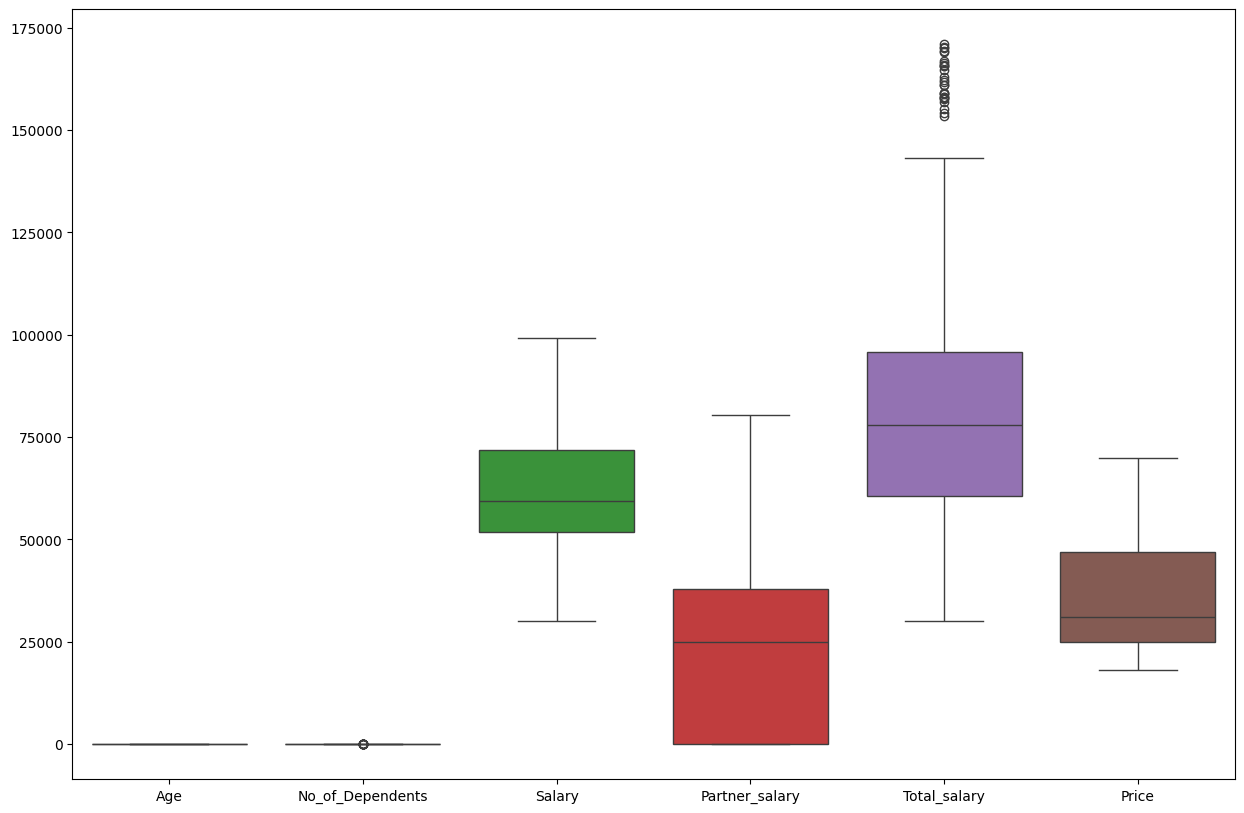

In [57]:
plt.figure(figsize= (15,10))
sns.boxplot(data=df)

We observe numerous extreme outliers in "Total_salary" due to its highly skewed distribution. Conversely, only one outlier is evident in "No_of_Dependents," while no outliers are present in the other variables.

23.Remove outliners

In [58]:
def outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lr= Q1-(1.5 * IQR)
    ur= Q3+(1.5 * IQR)
    return lr, ur

In [59]:
lr1,ur1=outlier(df['Total_salary'])
df['Total_salary']=np.where(df['Total_salary']>ur1,ur1,df['Total_salary'])
df['Total_salary']=np.where(df['Total_salary']<lr1,lr1,df['Total_salary'])

lr2,ur2=outlier(df['No_of_Dependents'])
df['No_of_Dependents']=np.where(df['No_of_Dependents']>ur2,ur2,df['No_of_Dependents'])
df['No_of_Dependents']=np.where(df['No_of_Dependents']<lr2,lr2,df['No_of_Dependents'])

<Axes: >

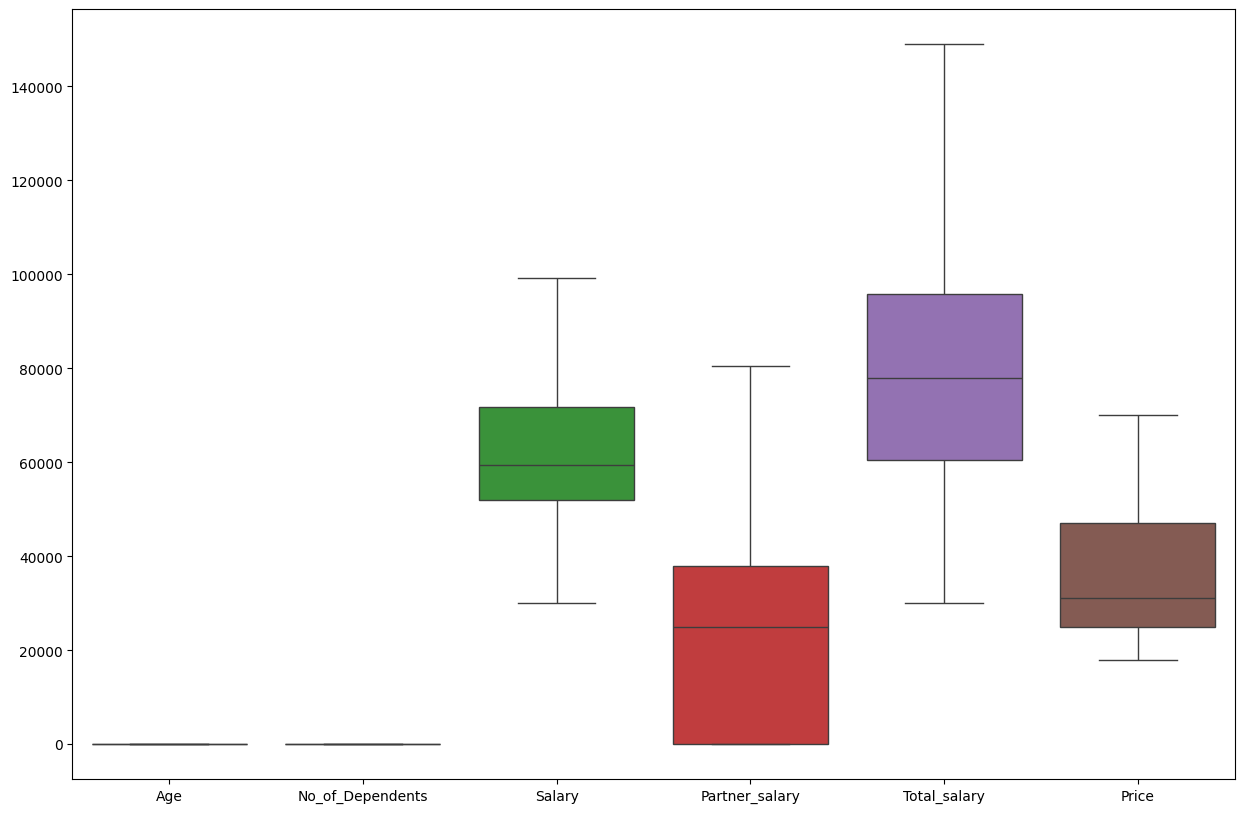

In [60]:
plt.figure(figsize= (15,10))
sns.boxplot(data=df)

After removing outliner

Encoding

In [61]:
df['Gender'].value_counts()

Gender
Male      1252
Female     329
Name: count, dtype: int64

In [62]:
df.Gender.replace(to_replace = 'Male', value='0')

0            0
1       Female
2       Female
3       Female
4            0
         ...  
1576         0
1577         0
1578         0
1579         0
1580         0
Name: Gender, Length: 1581, dtype: object

In [63]:
df.Gender.replace(to_replace = 'Female', value='1')

0       Male
1          1
2          1
3          1
4       Male
        ... 
1576    Male
1577    Male
1578    Male
1579    Male
1580    Male
Name: Gender, Length: 1581, dtype: object

In [64]:
df['Gender'].value_counts()

Gender
Male      1252
Female     329
Name: count, dtype: int64

In [65]:
df.groupby('Gender')['Make'].value_counts()

Gender  Make     
Female  SUV          173
        Sedan        141
        Hatchback     15
Male    Hatchback    567
        Sedan        561
        SUV          124
Name: count, dtype: int64

<Axes: xlabel='Make', ylabel='count'>

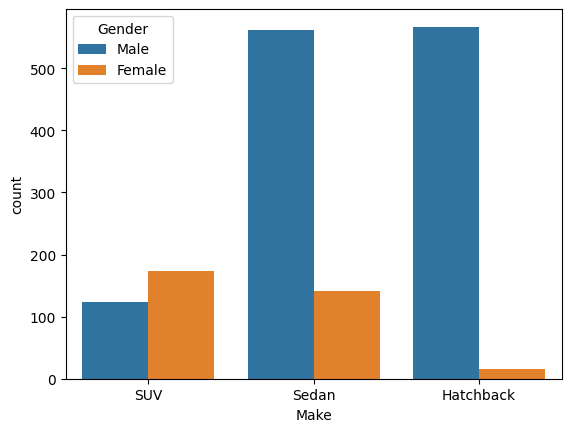

In [66]:

sns.countplot(x="Make", hue="Gender", data=df)


Based on the analysis provided, it seems that there are 173 females who prefer SUVs compared to 118 males. Therefore, it contradicts the statement that "Men prefer SUVs by a large margin compared to women," as the data suggests that more females prefer SUVs.

In [67]:
df.groupby('Profession')['Make'].value_counts()

Profession  Make     
Business    Sedan        306
            Hatchback    290
            SUV           89
Salaried    Sedan        396
            Hatchback    292
            SUV          208
Name: count, dtype: int64

<Axes: xlabel='Profession', ylabel='count'>

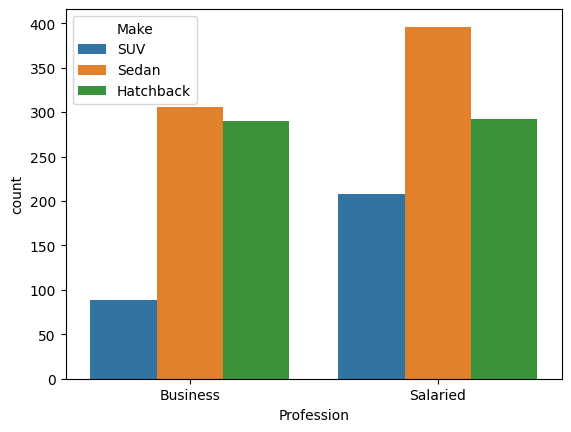

In [68]:
sns.countplot(x="Profession", hue="Make", data=df)

Indeed, the data indicates that there are 396 instances of salaried individuals purchasing sedans, while only 306 instances of individuals in the business profession buying sedans. Hence, we can agree with Ned Stark's statement that "A salaried person is more likely to buy a sedan."

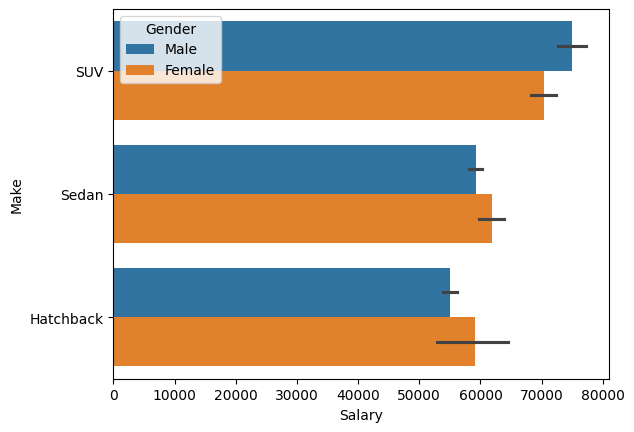

In [69]:
sns.barplot(x='Salary' , y='Make' , hue = 'Gender' , data=df);

Based on the plot, it appears that the count of salaried males purchasing SUVs exceeds that of sedans, compared to salaried females. Therefore, it aligns with Sheldon Cooper's statement that "a salaried male is an easier target for an SUV sale over a sedan sale."

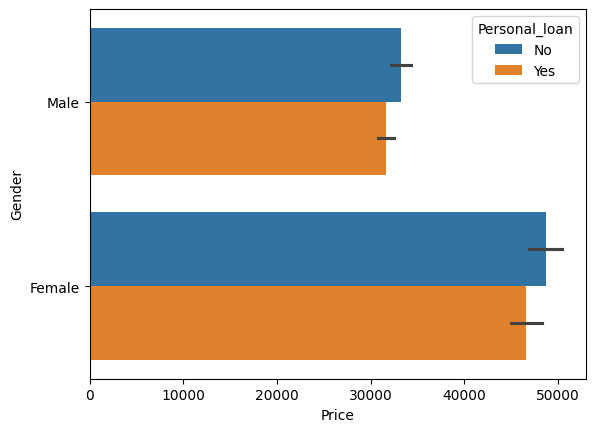

In [70]:
sns.barplot(x='Price' , y='Gender' , hue = 'Personal_loan' , data=df);

Based on the analysis, it appears that females are spending more than males, regardless of gender. Additionally, concerning personal loans, it can be concluded that females who do not have personal loans are spending more on purchasing automobiles compared to males. However, the count of females opting for personal loans is nearly equal to the count of females not opting for personal loans.

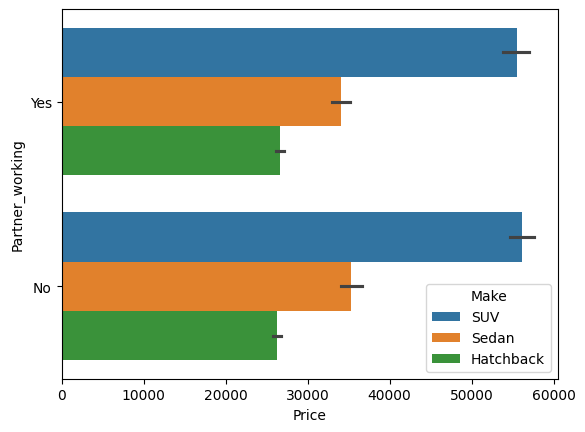

In [71]:
sns.barplot(x='Price' , y='Partner_working' , hue = 'Make' , data=df);

Based on the analysis, it appears that individuals with non-working partners are slightly more inclined towards purchasing higher-priced cars compared to those with working partners. However, the difference between the two groups is not substantial, with individuals having working partners also showing a propensity for purchasing higher-priced cars. Therefore, it cannot be conclusively stated that having a working partner leads to the purchase of a higher-priced car, disproving the statement.

<Axes: xlabel='Price', ylabel='Marital_status'>

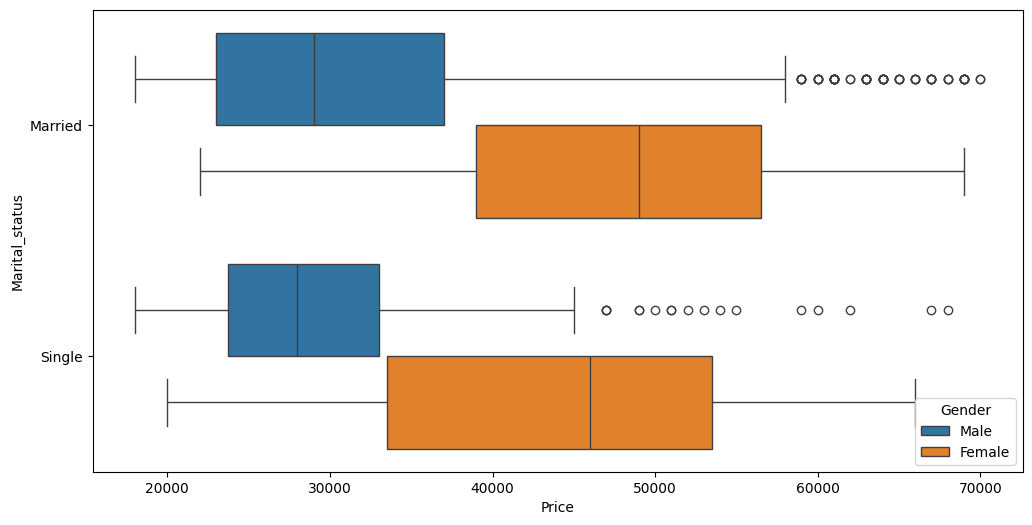

In [72]:
fig_dims = (12, 6)
fig = plt.subplots(figsize=fig_dims)
sns.boxplot(x='Price', y='Marital_status', hue='Gender',data=df)

Based on the analysis, it is observed that for males, both single and married individuals show median purchase values that are very close to each other. Similarly, for females, the purchase history between married and single individuals appears to be nearly identical.

<Axes: xlabel='Price', ylabel='Gender'>

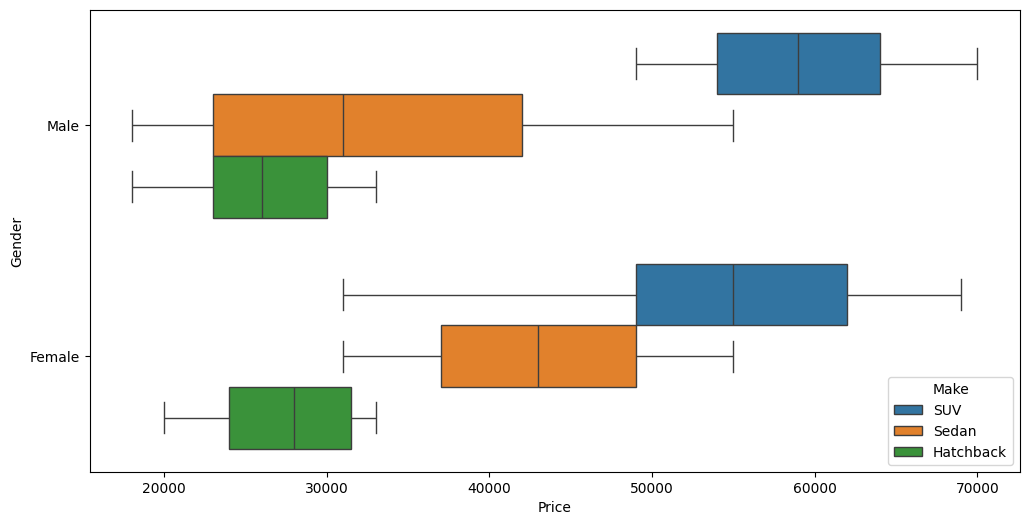

In [73]:
fig_dims = (12, 6)
fig = plt.subplots(figsize=fig_dims)
sns.boxplot(x='Price', y='Gender', hue='Make',data=df)

From the plot, it appears that the purchase history of SUV automobiles is similar for both males and females. However, for other car models, there is no evidence of similar purchase histories between genders, as the distributions are not uniform.

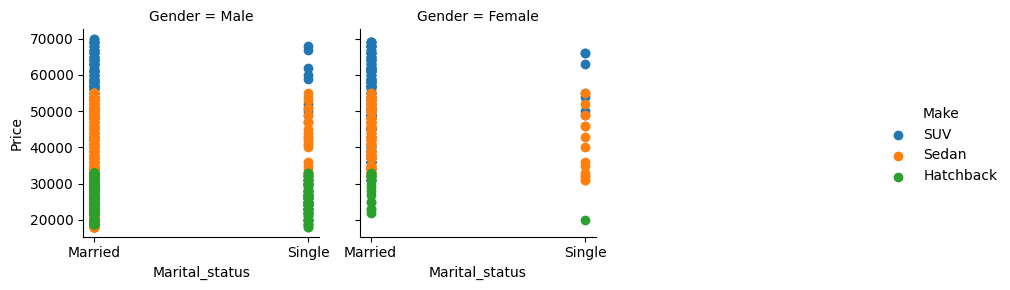

In [74]:
g = sns.FacetGrid(df, col="Gender", hue='Make',col_wrap=3, height=3)
g = g.map(plt.scatter, "Marital_status", 'Price')
g.add_legend()

Analyzing all variables together, it seems that married males and married females exhibit similar purchase histories across all car models. However, for single males and single females, their purchase history patterns appear scattered and inconsistent, lacking similarity between the genders.

**Actionable Insight:**

**Diversify Product Offerings:**
 Develop and introduce new car models or variants that cater to the preferences of married females, especially those who are employed. Consider designing vehicles with features and specifications that appeal to this demographic segment.

**Competitive Pricing Strategy: **
Conduct a thorough analysis of the features and pricing of the other two models in comparison to the SUV model preferred by married, employed females. Implement competitive pricing strategies to ensure that the new models offer value for money and are attractive alternatives to SUVs.

**Feature Customization: **
Offer customization options for car features to cater to the diverse preferences and needs of married, employed females. Allow customers to personalize their vehicles according to their lifestyle, preferences, and budget constraints.

**Tailored Marketing Campaigns: **
Develop targeted marketing campaigns specifically tailored to appeal to married, employed females. Highlight the unique features, benefits, and value propositions of the new car models, emphasizing how they meet the needs and preferences of this demographic group.

**Enhanced Customer Experience: **
Focus on providing an exceptional customer experience throughout the purchasing journey, from pre-sales inquiries to post-sales support. Train sales representatives to understand the specific requirements of married, employed females and to provide personalized assistance and recommendations.

**Continuous Monitoring and Adaptation: **
Continuously monitor customer feedback, sales performance, and market trends to identify areas for improvement and adaptation. Stay agile and responsive to changes in consumer preferences, technological advancements, and competitive dynamics.


By implementing these actionable insights, the company can effectively capitalize on the preferences and purchasing behavior of married, employed females, thereby expanding its market share and enhancing its competitive position in the automotive industry.




**Business Recommendation:**

Based on the comprehensive analysis, it is evident that married females, particularly those who are employed, are spending more on automobiles, particularly the SUV model. Therefore, it's crucial to assess the features and pricing of the other two models in comparison to the SUV model. By identifying and highlighting unique features and competitive pricing, we can potentially attract female customers and expand the market share beyond SUVs. Customization options and tailored marketing strategies can also be implemented to cater to the preferences and needs of different demographic groups within the female gender category.